# Airbender

In [3]:
# conda install pandas
# conda install matplotlib
# conda install -c derickl coremltools
import pandas as pd
import numpy as np

In [245]:
names = [str(x) for x in range(1,101)]
names.insert(0,"Gesture")
names.insert(0,"Participant")

acc_x = pd.read_csv("data_resampled/acc_x.csv", sep=";", names = names).dropna()
acc_y = pd.read_csv("data_resampled/acc_y.csv", sep=";", names = names).dropna()
acc_z = pd.read_csv("data_resampled/acc_z.csv", sep=";", names = names).dropna()
gyr_x = pd.read_csv("data_resampled/gyr_x.csv", sep=";", names = names).dropna()
gyr_y = pd.read_csv("data_resampled/gyr_y.csv", sep=";", names = names).dropna()
gyr_z = pd.read_csv("data_resampled/gyr_z.csv", sep=";", names = names).dropna()

In [246]:
acc_x.shape

(221, 102)

In [247]:
acc_x.head()

,Participant,Gesture,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,Gix1,0,0.006969,0.000848,-0.000720,-0.009030,-0.004277,0.000759,0.002966,-0.000850,...,0.001368,-0.000564,-0.001737,-0.001106,-0.006170,-0.005773,-0.002984,0.000482,0.002133,0.002793
1,Gix1,1,-0.009553,-0.011066,-0.004418,-0.003037,-0.002963,-0.007740,-0.004091,-0.004082,...,-0.002965,-0.005508,-0.006514,-0.011621,-0.011665,-0.010188,-0.003994,0.007893,0.011737,0.008740
2,Gix1,2,-0.005957,-0.010512,-0.020735,-0.043233,-0.049574,-0.041784,0.066144,0.179850,...,0.023357,0.025490,0.021612,0.010510,0.003288,0.009596,0.001628,0.008208,0.002435,-0.012939
3,Gix1,3,-0.006112,0.001685,-0.009567,-0.002749,-0.003493,0.003675,0.016477,-0.004954,...,0.053803,0.054990,0.045988,0.042890,0.037902,0.049565,0.051274,0.053112,0.066124,0.039360
4,Gix1,4,-0.002025,-0.008841,-0.012501,-0.006683,-0.005849,-0.003792,-0.009695,0.004547,...,0.030336,0.034947,0.042776,0.055322,0.058870,0.040724,0.013058,-0.011792,-0.025957,-0.041154


In [248]:
import matplotlib.pyplot as plt

### Plot some info about data

In [249]:
names = ['Participant', 'Gesture']
data_x = acc_x.values[:, ~acc_x.columns.isin(names)]
plot_data = data_x[0].astype(np.float32, copy=False)
plot_data = plot_data[~pd.isnull(plot_data)]

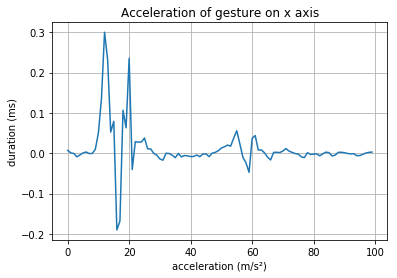

In [250]:
plt.plot(plot_data)
plt.title('Acceleration of gesture on x axis')

plt.xlabel('acceleration (m/s²)')
plt.ylabel('duration (ms)')
plt.grid(True)

### FFT

In [251]:
fft_data = np.fft.fft(plot_data)

In [252]:
n = plot_data.size
timestep = 0.02
freq = np.fft.fftfreq(n, d=timestep)
magnitude = np.sqrt(fft_data.real**2 + fft_data.imag**2)

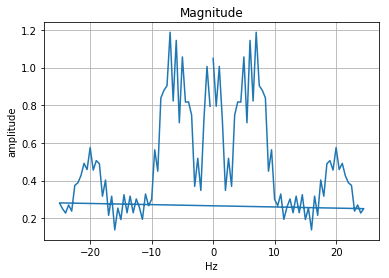

In [253]:
plt.plot(freq, magnitude)
plt.title('Magnitude')

plt.xlabel('Hz')
plt.ylabel('amplitude')
plt.grid(True)

### Train model

In [257]:
X = acc_x.iloc[:, 2:102].values
y = acc_x.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [285]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

### Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Test model

In [286]:
### LDA
predicted_y = clf.predict(X_test)

### Random Forest
rf_predicted_y = clf_rf.predict(X_test)

In [289]:
from sklearn.metrics import confusion_matrix

### LDA
cm = confusion_matrix(y_test, predicted_y)

### Random Forest
rf_cm = confusion_matrix(y_test, rf_predicted_y)

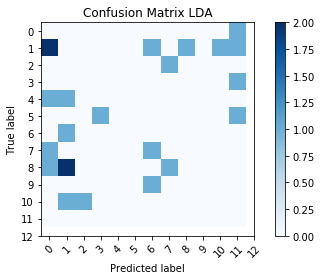

In [290]:
classes = [0,1,2,3,4,5,6,7,8,9,10,11,12]

### LDA
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix LDA")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

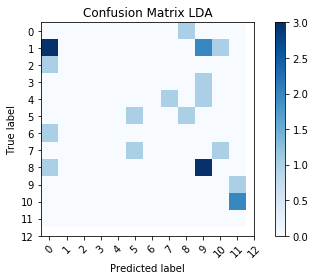

In [291]:
classes = [0,1,2,3,4,5,6,7,8,9,10,11,12]

### Random Forest
plt.imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix LDA")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

### Save Model

In [292]:
import pickle
filename = 'randomForest.model'
pickle.dump(clf_rf, open(filename, 'wb'))